<a href="https://colab.research.google.com/github/AlvinDefanno/Pyton-for-Database/blob/main/belajar2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path

In [ ]:
df = pd.read_csv("/content/Dataset/telco-churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
## 1.Menghitung jumlah baris dan kolom pada dataset
df.shape

(7043, 21)

In [ ]:
## 2.ini merupakan kolom dan terdapat 21 variabel
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
## 3.Mengecek kesesuaian tipe data dengan kolom deskripsi
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
## info dari rincian tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
## 4.Explore setiap fitur dengan melihat satistika deskriptif

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
## 5. Dari hasil explore yang dilakukan didapat beberpa hal seperti :

## Untuk kolom SeniorCetizen, tenure, MonthlyCharges memiliki nilai yang masuk akal
## tenure memiliki nilai q1, q2, q3 dengan jumllah lebih dari nilai max
## Sedangkan SeniorCetizen memiliki q1, q2, q3 dengan nilai 0 maka akan dilihat apakah kolom tersebut perlu di clean atau tidak 

In [ ]:
##

In [ ]:
## DATA CLEANING
## Mengecek adanya missing values pada data,

df.isnull().sum()
#  maka tidak dilakukan procesing data cleaning

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
## Mengecek adanya data yang duplikasi

df.duplicated().any()
 ## maka tidak dilakukan procesing data cleaning

False

In [ ]:
##Kemungkinan yang tidak dan akan melanjutkan berlangganan
df.groupby('Churn').count()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
Churn,,,,,,,,,,,,,,,,,,,,
No,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174
Yes,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869


In [ ]:
## Explore data dengan melihat stistika deskriptif

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


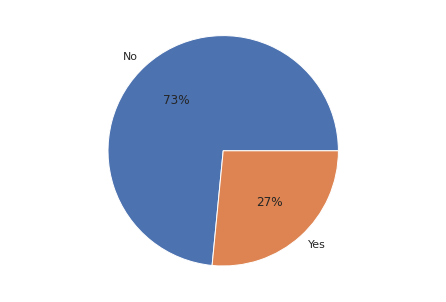

In [ ]:
## 1. Hasil dari implementasi terhadap model machine learning logistic regression.
## Memvisualisasi persentase Churn pada dataset

fig = plt.figure() 
ax = fig.add_axes([0,0,1,1]) 
ax.axis('equal') 
labels = ['No','Yes'] 
churn = df.Churn.value_counts() 
ax.pie(churn, labels=labels, autopct='%.0f%%') 
plt.show()

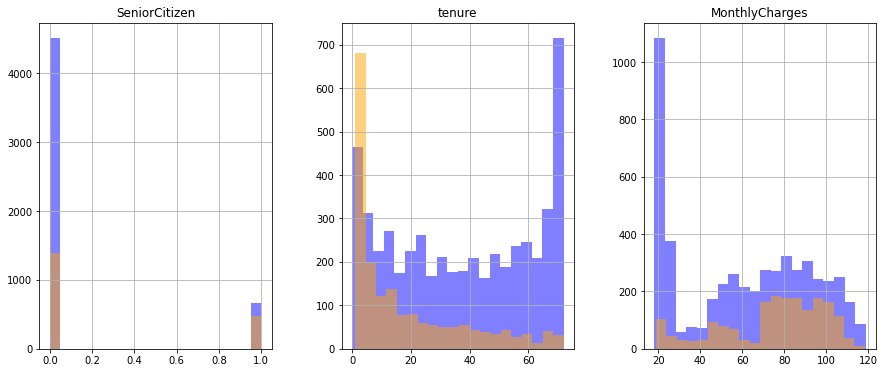

In [ ]:
#membuat distribution diagram untuk 3 variabel numerik berikut 
numerical_features = ['SeniorCitizen',	'tenure',	'MonthlyCharges']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

df[df.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df[df.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

## warna coklat muda menunjukan potensi churn, biru menunjukan potensi tidak churn, sedangkan warna coklat tua menunjuan indikator grafik coloumn 

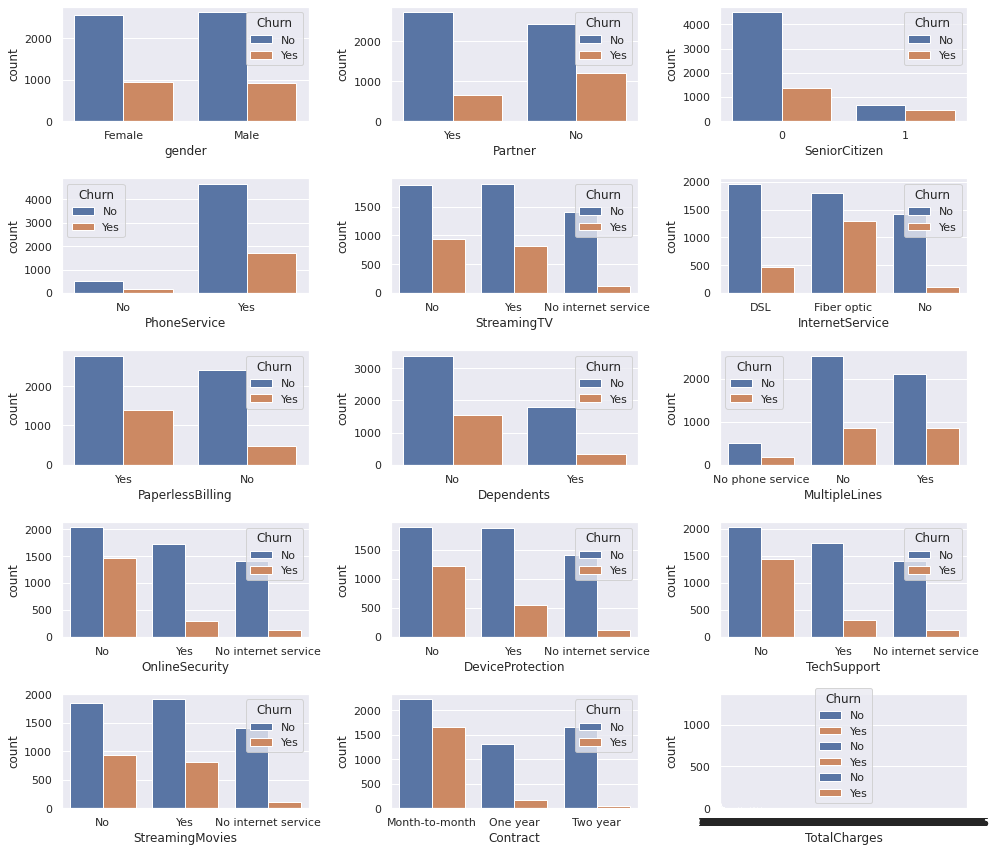

In [ ]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(5, 3, figsize=(14, 12))
# menampilkan data berdasarkan variabel kategorikal yang ada
sns.countplot(data=df, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df, x='PaperlessBilling', hue='Churn', ax=ax[2][0])
sns.countplot(data=df, x='Dependents', hue='Churn', ax=ax[2][1])
sns.countplot(data=df, x='MultipleLines', hue='Churn', ax=ax[2][2])
sns.countplot(data=df, x='OnlineSecurity', hue='Churn', ax=ax[3][0])
sns.countplot(data=df, x='DeviceProtection', hue='Churn', ax=ax[3][1])
sns.countplot(data=df, x='TechSupport', hue='Churn', ax=ax[3][2])
sns.countplot(data=df, x='StreamingMovies', hue='Churn', ax=ax[4][0])
sns.countplot(data=df, x='Contract', hue='Churn', ax=ax[4][1])
sns.countplot(data=df, x='PaymentMethod', hue='Churn', ax=ax[4][2])
sns.countplot(data=df, x='MonthlyCharges', hue='Churn', ax=ax[4][2])
sns.countplot(data=df, x='TotalCharges', hue='Churn', ax=ax[4][2])
	
plt.tight_layout()
plt.show()

In [ ]:
# hapus variabel customerID dari dataset
cleaned_df = df.drop(['customerID'], axis=1)
print(cleaned_df.head())

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  

In [ ]:
##1 proses encoding data
from sklearn.preprocessing import LabelEncoder
#konversi variabel tipe non-numerikal ke tipe numerikal  
for column in cleaned_df.columns:
    if cleaned_df[column].dtype == np.number: continue
    #terapkan encoding pada tiap variabel non-numerikal
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])
print(cleaned_df.head())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  after removing the cwd from sys.path.


In [ ]:
## proses membagi data menjadi 2 bagian
from sklearn.model_selection import train_test_split
# Predictor -> X dan target -> y
X = cleaned_df.drop('Churn', axis = 1)
y = cleaned_df['Churn']
# Splitting data train dan data test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Print deskripsi
print('Jumlah baris dan kolom dari x_train adalah: ', x_train.shape, ', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Persentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:', x_test.shape, ', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Persentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah:  (4930, 19) , sedangkan Jumlah baris dan kolom dari y_train adalah: (4930,)
Persentase Churn di data Training adalah:
0    0.737323
1    0.262677
Name: Churn, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (2113, 19) , sedangkan Jumlah baris dan kolom dari y_test adalah: (2113,)
Persentase Churn di data Testing adalah:
0    0.728348
1    0.271652
Name: Churn, dtype: float64


In [ ]:
#Menampilkan hasil training dengan confusion matrix
from sklearn.metrics import classification_report
# Predict
y_train_pred = log_model.predict(x_train)
# Print classification report 
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      3635
           1       0.64      0.54      0.58      1295

    accuracy                           0.80      4930
   macro avg       0.74      0.71      0.73      4930
weighted avg       0.79      0.80      0.79      4930



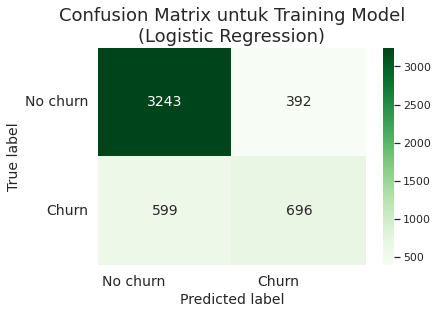

In [ ]:
#Menampilkan hasil training model dengan visualisasi heatmap dari confusion matrix 
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='Greens')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix untuk Training Model\n(Logistic Regression)', fontsize=18)
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
## 2. Hasil analisis dengan model logestic regression

##  Dari hasil training dataset yang telah kami lakukan bahwa model logistik regresion bahwa telah di temuka
##  hasil dari tabel true bahwa ada sebanyak 3243 kemungkinan yang akan bertahan, sedangkan ada 392 yang 
##  kemunkinan besar tidak akan melanjutkan berlangganan. namun pada hasil prediksi label ditemukan juga, 
##  Sebanyak non churn 599 dan churn 696.